Last update 04.11.2019

Author : Jeanne Colbois
Please send any comments, questions or remarks to Jeanne Colbois: jeanne.colbois@epfl.ch.
The author would appreciate to be cited in uses of this code, and would be very happy to hear about potential nice developments.

In [1]:
# Import modules
import numpy as np # maths

from time import time# timer for debug
    # gather results obtained from the runs  
    # system commands
import os

import KagomeFunctions_OBC as kf # "library" allowing to work on Kagome
import KagomeDrawing_Reduced as kdraw # "library" allowing to plot Kagome
import AnalysisFunctions_OBC as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14})

In [2]:
# Create a folder to save the pictures
#foldername = 'Tests_SpinConfigs/'
#results_foldername = 'Results_Tests_SpinConfigs'
#os.makedirs('./' + foldername + 'Plots' + results_foldername, exist_ok = True)

In [3]:
#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/',]*2
#secondfilename = ['54-1_Demag2_5-BR_spin_config.txt','54-1_Demag2_5-TL_spin_config.txt']

#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']*3
#secondfilename = ['54-1_Demag3_5-BL_spin_config.txt',
#                  '54-1_Demag3_5-BR_spin_config.txt',
#                  '54-1_Demag3_5-TL_spin_config.txt']

#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']*2
#secondfilename = ['54-1_Demag4_5-BL_spin_config.txt',
#                  '54-1_Demag4_5-TL_spin_config.txt']

#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']*3
#secondfilename = ['54-1_Demag5_5-BL_spin_config.txt',
#                  '54-1_Demag5_5-BR_spin_config.txt',
#                  '54-1_Demag5_5-TL_spin_config.txt']
#
#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']*3
#secondfilename = ['54-1_Demag6_5-BL_spin_config.txt',
#                  '54-1_Demag6_5-BR_spin_config.txt',
#                  '54-1_Demag6_5-TL_spin_config.txt']
#
secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']
secondfilename = ['54-1_Demag7_4-BL_spin_config.txt']#,
                  #'54-1_Demag7_4-BR_spin_config.txt',
                  #'54-1_Demag7_4-TL_spin_config.txt',
                  #'54-1_Demag7_4-TR_spin_config.txt',
                  #'54-1_Demag7_5-BL_spin_config.txt',
                  #'54-1_Demag7_5-BR_spin_config.txt',##'54-1_Demag7_5-TL_spin_config.txt',

------------------- File number  0  ----------------------
740.89   1066.7   896.63   978.63
178.9169430210566
magnetisation:  [-0.18814433]


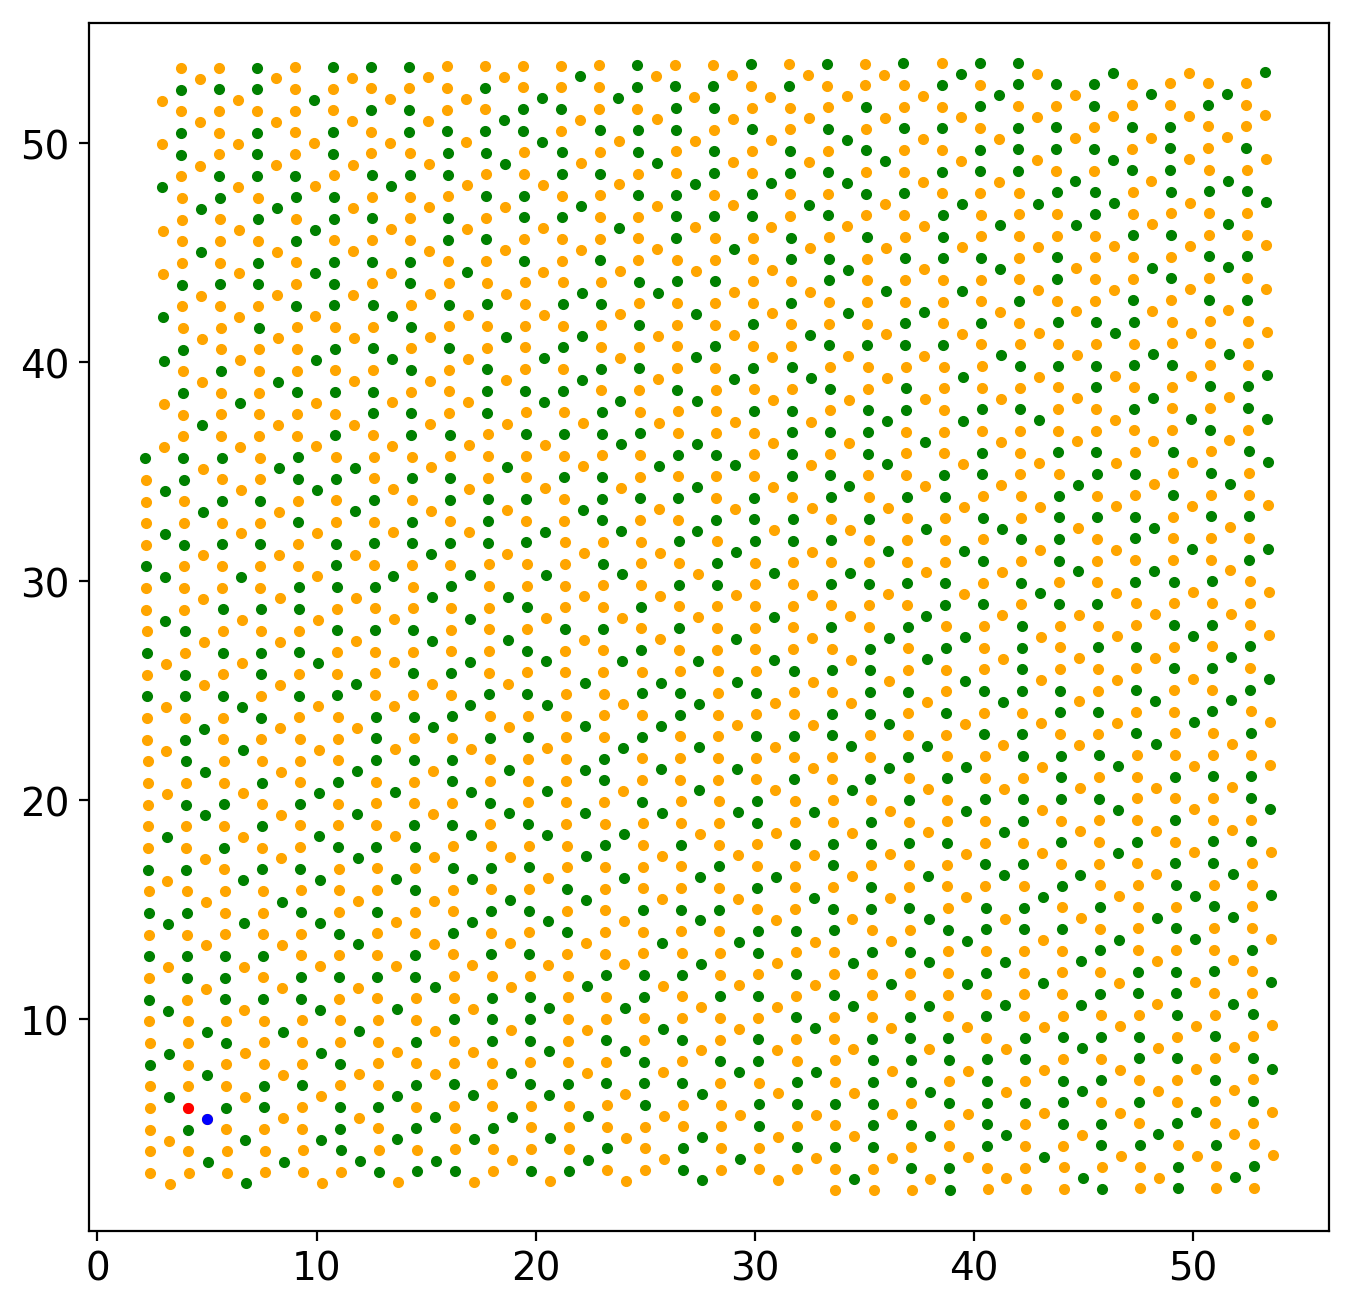

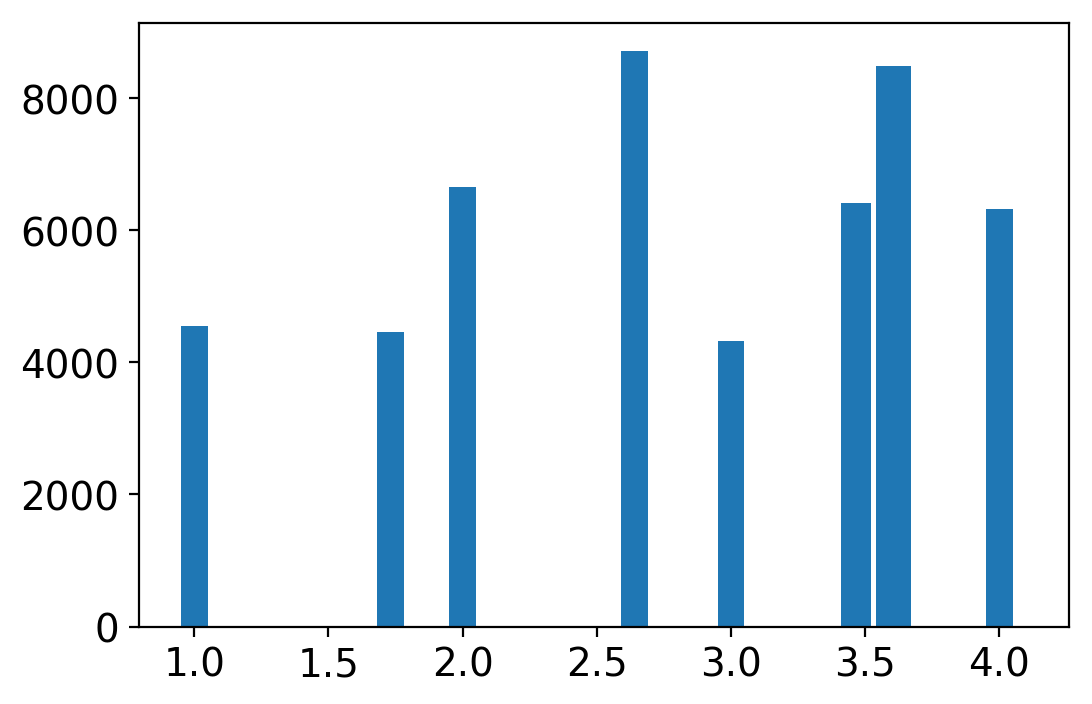

<Figure size 432x288 with 0 Axes>

length 4545
Values [(454, 456), (1078, 1080), (1545, 1546), (1703, 1704), (1861, 1862), (2017, 2018), (453, 457), (454, 458), (609, 613), (610, 614), (765, 769), (766, 770), (921, 925), (1077, 1081), (1078, 1082), (1233, 1237), (1707, 1711), (2071, 2225), (452, 455), (918, 920), (924, 926), (1710, 1712), (418, 420), (562, 564), (1294, 1296), (1646, 1648), (29, 165), (934, 936), (617, 771), (251, 405), (335, 489), (485, 639), (1271, 1427), (1423, 1579), (202, 204), (81, 84), (1924, 1927), (1930, 1933), (1990, 1993), (2036, 2038), (2050, 2053), (2084, 2086), (2090, 2092), (2096, 2098), (2110, 2113), (2150, 2152), (2170, 2171), (2188, 2191), (2194, 2197), (2216, 2218), (2228, 2230), (2236, 2239), (2242, 2245), (2254, 2257), (2276, 2278), (2282, 2284), (2288, 2290), (2294, 2296), (2302, 2305), (2314, 2317), (706, 708), (850, 852), (149, 303), (65, 201), (191, 345), (501, 504), (839, 993), (899, 1053), (302, 304), (893, 1047), (1775, 1931), (1835, 1991), (749, 903), (714, 715), (832, 833), 

In [4]:
n = len(secondfilename)

factors = [177, 178]
nnloclist = [(11,12), (11,12)]

#factors = [178.34, 178.29, 178]
#nnloclist = [(11,12), (10,11), (11,12)]

#factors = [179, 179]
#nnloclist = [(10,11), (10,11)]
#
#factors = [179, 179, 180]
#nnloclist = [(10,11), (10,11), (11,12)]
#

#factors = [180, 177, 179]
#nnloclist = [(11,12), (11,12), (11,12)]

factors = [179]#, 177, 177, 176.5, 179, 178.5, 177.5, 179]
nnloclist = [(10,11)]#,(10,11),(10,11),(11,12),(10,11),(11,12),(11,12),(10,11)]
distconds = [(0.95, 1.05), (1.68, 1.78), (1.95, 2.05), (2.59, 2.69), (2.95, 3.05), (3.41, 3.52), (3.54, 3.67), (3.95, 4.05)]
imgfile = ""

covlist = []
varcovlist = []
dlist = []
vardlist = []


for i in range(len(secondfilename)):
    print("------------------- File number ", i, " ----------------------")
    factor = factors[i]
    configlist, x, y, sconf= af.LoadSpinConfigsLarge(secondfoldername[i], secondfilename[i], imgfile, alpha = 1, factor = factor)

    plt.plot(x[nnloclist[i][0]]/factor, y[nnloclist[i][0]]/factor,'.', color = "red")
    plt.plot(x[nnloclist[i][1]]/factor, y[nnloclist[i][1]]/factor,'.', color = "blue")
    print(x[nnloclist[i][0]]," ", y[nnloclist[i][0]], " ", x[nnloclist[i][1]], " ", y[nnloclist[i][1]])
    print(np.sqrt((x[nnloclist[i][0]]-x[nnloclist[i][1]])**2 + (y[nnloclist[i][0]]-y[nnloclist[i][1]])**2))
    m = sum(sconf)/len(sconf)
    print("magnetisation: ", m)
    
    distances_s1s2 = af.KagomeLatticeHistogram(x,y, factor=factor)
    plt.savefig(secondfoldername[i] + 'Histogram' + secondfilename[i]+'.png')
    plt.show()
    NNList = af.KagomeLatticeNeighboursLists(distances_s1s2, distconds)
    print("length",len(NNList[0]))
    print("Values",NNList[0])
    #cconf, xc,yc, tlist = af.KagomeLatticeCharges(NNList,sconf,x,y)
    #charges = [np.count_nonzero(cconf == 3), np.count_nonzero(cconf == 1),
    #       np.count_nonzero(cconf == -1), np.count_nonzero(cconf == -3)]
    #print(charges)
    #np.savetxt(secondfoldername[i] + 'charges' + secondfilename[i],
    #       np.array(charges), newline=",")
    #
    #fig, ax = plt.subplots(figsize = (8,8),dpi=200)
    #af.plotSpinSites(secondfoldername, imgfile, x, y, 
    #             [i for i in range(len(x)) if sconf[i] == 1],
    #             putimage = False, color = 'blue', alpha = 1,
    #             linestyle = 'none')
    #af.plotSpinSites(secondfoldername, imgfile, x, y, 
    #                 [i for i in range(len(x)) if sconf[i] == -1],
    #                 putimage = False, color = 'red', alpha = 1,
    #                 linestyle = 'none')
    #af.plotSpinSites(secondfoldername, imgfile, xc, yc, 
    #                 [i for i in range(len(xc)) if abs(cconf[i]) == 3], 
    #                 putimage = False, color = 'yellow', alpha = 1,
    #                 linestyle = 'none')
    #af.plotSpinSites(secondfoldername, imgfile, xc, yc, 
    #                 [i for i in range(len(xc)) if abs(cconf[i]) == 1], 
    #                 putimage = False, color = 'green', alpha = 1,
    #                 linestyle = 'none')
    #plt.savefig(secondfoldername[i] + 'State_' + secondfilename[i]+'.png')
    #plt.show()

    cov = []
    varcov = []
    d = []
    vard = []

    for j in range(9):
        print(j)
        cov0, varcov0, d0, vard0= af.ComputeNthCorrList(NNList[j], sconf, x, y, factor)
        cov.append(cov0)
        varcov.append(varcov0)
        d.append(d0)
        vard.append(vard0)
      
    covlist.append(cov)
    varcovlist.append(varcov)
    dlist.append(d)
    vardlist.append(vard)
    
    
        
    del configlist
    del x
    del y
    del sconf
    del distances_s1s2
    del NNList
    #del cconf
    #del xc
    #del yc
    #del charges
    del cov
    del varcov
    del d
    del vard


In [5]:
d = np.array(dlist).sum(0)/n
vard = np.array(vardlist).sum(0)/n

cov = np.array(covlist).sum(0)/n
varcov = np.array([(covlist[i] - cov)**2 for i in range(n)]).sum(0)/n

varcov2 = np.array(varcovlist).sum(0)/n

In [13]:
print(cov)
print(len(configlist))

[[-0.23097914]
 [ 0.04166355]
 [ 0.07083584]
 [-0.00574247]
 [-0.00886542]
 [-0.01919364]
 [-0.03074045]
 [-0.04607033]
 [ 0.04192862]]


NameError: name 'configlist' is not defined

In [6]:
print(np.sqrt(np.array(varcov)))
print(np.sqrt(np.array(varcov2)))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.01365583]
 [0.01448978]
 [0.01454045]
 [0.0205319 ]
 [0.01034825]
 [0.01465944]
 [0.01475954]
 [0.02081385]
 [0.01051277]]


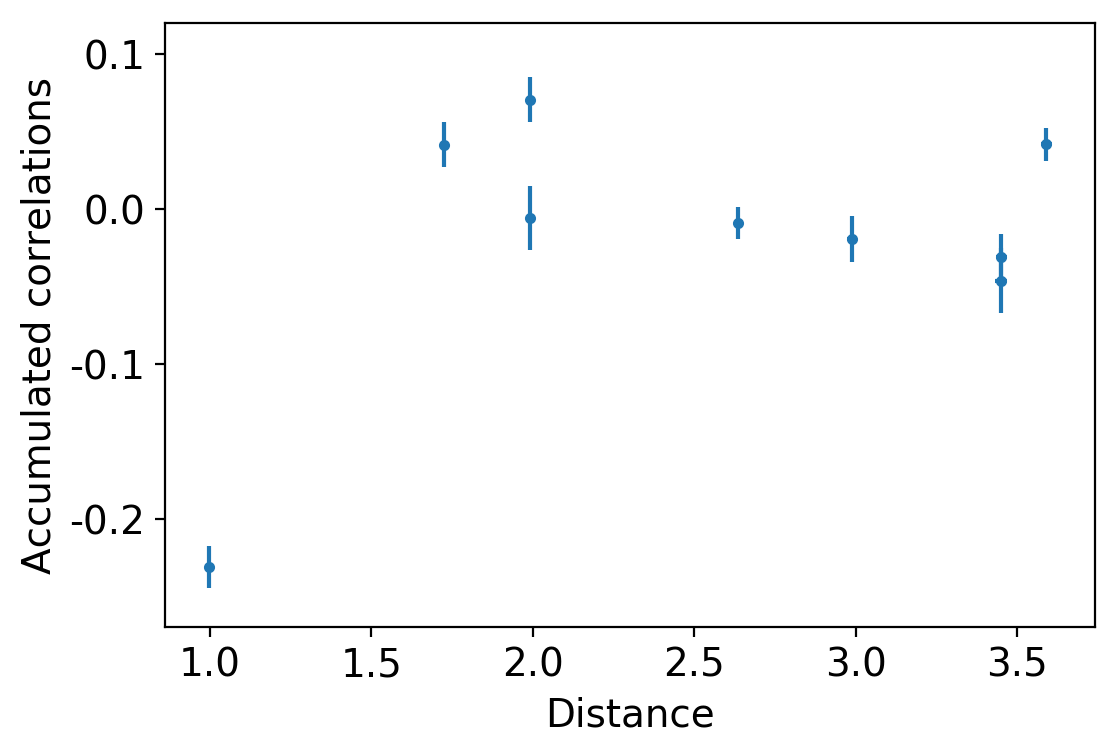

In [7]:
fig, ax = plt.subplots(dpi=200)
plt.errorbar(d, np.array(cov),xerr = np.sqrt(np.array(vard)),yerr=np.sqrt(np.array(varcov2)),  fmt= '.')
plt.xlabel('Distance')
plt.ylabel('Accumulated correlations')
plt.ylim(-0.27,0.12)
plt.savefig(secondfoldername[i] + 'FirstResult_' + secondfilename[i]+'.png')
plt.show()

In [11]:
print(covlist[0])

[array([-0.23097914]), array([0.04166355]), array([0.07083584]), array([-0.00574247]), array([-0.00886542]), array([-0.01919364]), array([-0.03074045]), array([-0.04607033]), array([0.04192862])]


In [ ]:
ListNei = ['1', '2', '3par', '3star', '4', '5', '6', '6bis', '7', '8', '8bis','9']
for i in range(n):
    fig, ax = plt.subplots(figsize = (8,8), dpi=200)
    x = [1 for y in cov[i]];

    for index, covi in enumerate(covlist[i][0:8]):
        print(index)
        plt.errorbar(1, covi,yerr=np.sqrt(np.array(varcovlist[i])[index]), label='Neighbour {0}'.format(ListNei[index]),  fmt= 'x', )

    plt.xlabel('')
    plt.ylabel('Accumulated correlations')
    plt.ylim(-0.27, 0.12)
    plt.legend(loc='best')
    plt.savefig(secondfoldername[i]+'FirstFewCorrelations'+secondfilename[i]+'.png')

fig, ax = plt.subplots(figsize = (8,8),dpi=200)
x = [1 for y in cov];

for index, covi in enumerate(cov[0:8]):
    print(index)
    plt.errorbar(1, covi,yerr=np.sqrt(np.array(varcov2)[index]), label='Neighbour {0}'.format(ListNei[index]),  fmt= 'x', )
plt.xlabel('')
plt.ylabel('Accumulated correlations')
plt.ylim(-0.27, 0.12)
plt.legend()
plt.savefig(secondfoldername[0]+'AvgFirstFewCorrelations'+secondfilename[0]+'.png')    

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag3_5-BL_spin_config.txt'
#imgfile = ""
#factor = 178.34
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag3_5-BR_spin_config.txt'
#imgfile = ""
#factor = 178.29
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag3_5-TL_spin_config.txt'
#imgfile = ""
#factor = 178
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag4_5-BL_spin_config.txt'
#imgfile = ""
#factor = 179
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag4_5-TL_spin_config.txt'
#imgfile = ""
#factor = 179.11
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag5_5-BL_spin_config.txt'
#imgfile = ""
#factor = 179.11
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag5_5-BR_spin_config.txt'
#imgfile = ""
#factor = 179.11
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag5_5-TL_spin_config.txt'
#imgfile = ""
#factor = 180
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag6_5-BL_spin_config.txt'
#imgfile = ""
#factor = 180
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag6_5-BR_spin_config.txt'
#imgfile = ""
#factor = 177
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag6_5-TL_spin_config.txt'
#imgfile = ""
#factor = 179
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_4-BL_spin_config.txt'
#imgfile = ""
#factor = 178.9
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_4-BR_spin_config.txt'
#imgfile = ""
#factor = 176.8
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_4-TL_spin_config.txt'
#imgfile = ""
#factor = 177.1
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_4-TR_spin_config.txt'
#imgfile = ""
#factor = 176.1
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_5-BL_spin_config.txt'
#imgfile = ""
#factor = 178.79
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_5-BR_spin_config.txt'
#imgfile = ""
#factor = 178.5
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_5-TL_spin_config.txt'
#imgfile = ""
#factor = 177.5
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#ssecondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#ssecondfilename = '54-1_Demag7_5-TR_spin_config.txt'
#iimgfile = ""
#ffactor = 178.7
#cconfiglist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#pplt.plot(x[43]/factor, y[43]/factor,'.', color = "red")
#pplt.plot(x[42]/factor, y[42]/factor,'.', color = "blue")
#pprint(x[43]," ", y[10], " ", x[11], " ", y[11])
#pprint(np.sqrt((x[43]-x[42])**2 + (y[43]-y[42])**2))
#mm = sum(sconf)/len(sconf)
#pprint(m)